In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')

In [42]:
df.dropna(subset=['price'], inplace=True)

In [43]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [44]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]


In [45]:
train_raw.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
5,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011


# 1. Pearson Correlation

<font color='red'>Assignment:</font> Get a Dataframe **train** which contains all the numerical values of **price**, **cost**, **weight**, **height**, **width**, and **depth** in **train_raw**.

In [46]:
#cols = ['price', 'cost', 'weight','weight','height','depth']
def price2num(x):
    """
    This function transform price string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        x = x.strip('$') # remove the dollar sign at the front of the substring
        x = x.replace(',', '') # remove ','
    return float(x)
df['price'] = df.price.map(price2num)

def cost2num(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: 
        x = x.strip('$').strip('k')
    return float(x)*1000
df['cost'] = df.cost.map(cost2num)

def weight2num(x):
    """
    This function transform weight string to numerical value. The unit kept is Ton
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' Kg') # remove the ' Kg' at the end of the substring
        x = x.replace(' Ton ', '.') # remove ' Ton '
    return float(x)
df['weight'] = df.weight.map(weight2num)

def height2num(x):
    """
    This function transform height string to numerical value. The unit kept is meters
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' meters') # remove the ' meters' at the end of the substring
    return float(x)
df['height'] = df.height.map(height2num)

def width2num(x):
    """
    This function transform width string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)
df['width'] = df.width.map(width2num)

def depth2num(x):
    """
    This function transform depth string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)
df['depth'] = df.depth.map(depth2num)
train_raw= df[['price', 'cost', 'weight','weight','height','depth']]


<font color='red'>Assignment:</font> Calculate Pearson correlations between all the columns in **train**. Using **DataFrame.corr()**.

In [47]:
pearsoncorr=train_raw.corr(method ='pearson')
pearsoncorr

,price,cost,weight,weight,height,depth
price,1.000000,0.627414,0.177028,0.177028,0.076193,0.084387
cost,0.627414,1.000000,0.218780,0.218780,0.074708,0.119569
weight,0.177028,0.218780,1.000000,1.000000,0.109349,0.232858
weight,0.177028,0.218780,1.000000,1.000000,0.109349,0.232858
height,0.076193,0.074708,0.109349,0.109349,1.000000,-0.837142
depth,0.084387,0.119569,0.232858,0.232858,-0.837142,1.000000


<font color='red'>Question:</font> How Pearson correlation is calcualted? What does it mean?

In [48]:
# Pearson correlation is a measure of the linear correlation between two variables X and Y
# it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

<font color='red'>Assignment:</font> Plot the correlations in heatmap using **seaborn**.

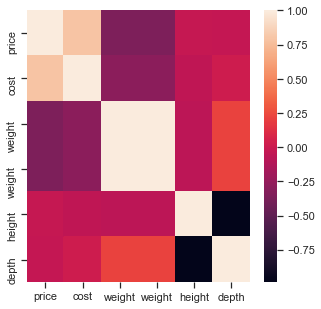

In [49]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sb.heatmap(train_raw.corr(method ='pearson').corr());


In [50]:
train_raw.head()

,price,cost,weight,weight,height,depth
0,300492.0,333000.0,3.90,3.90,2.76,26.0
1,430570.0,NaN,3.30,3.30,2.67,26.0
2,213070.0,270000.0,3.40,3.40,3.00,24.0
3,229174.0,NaN,3.50,3.50,2.50,27.0
4,122659.0,97000.0,2.97,2.97,2.47,26.0


<font color='red'>Assignment:</font> Visulize the relationships between these columns using **pairplot** in **seaborn**.

In [29]:
new=train_raw.dropna()
new1=new.fillna(new.mean())




C:\Users\chen\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\chen\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ValueError: could not broadcast input array from shape (2210) into shape (2)

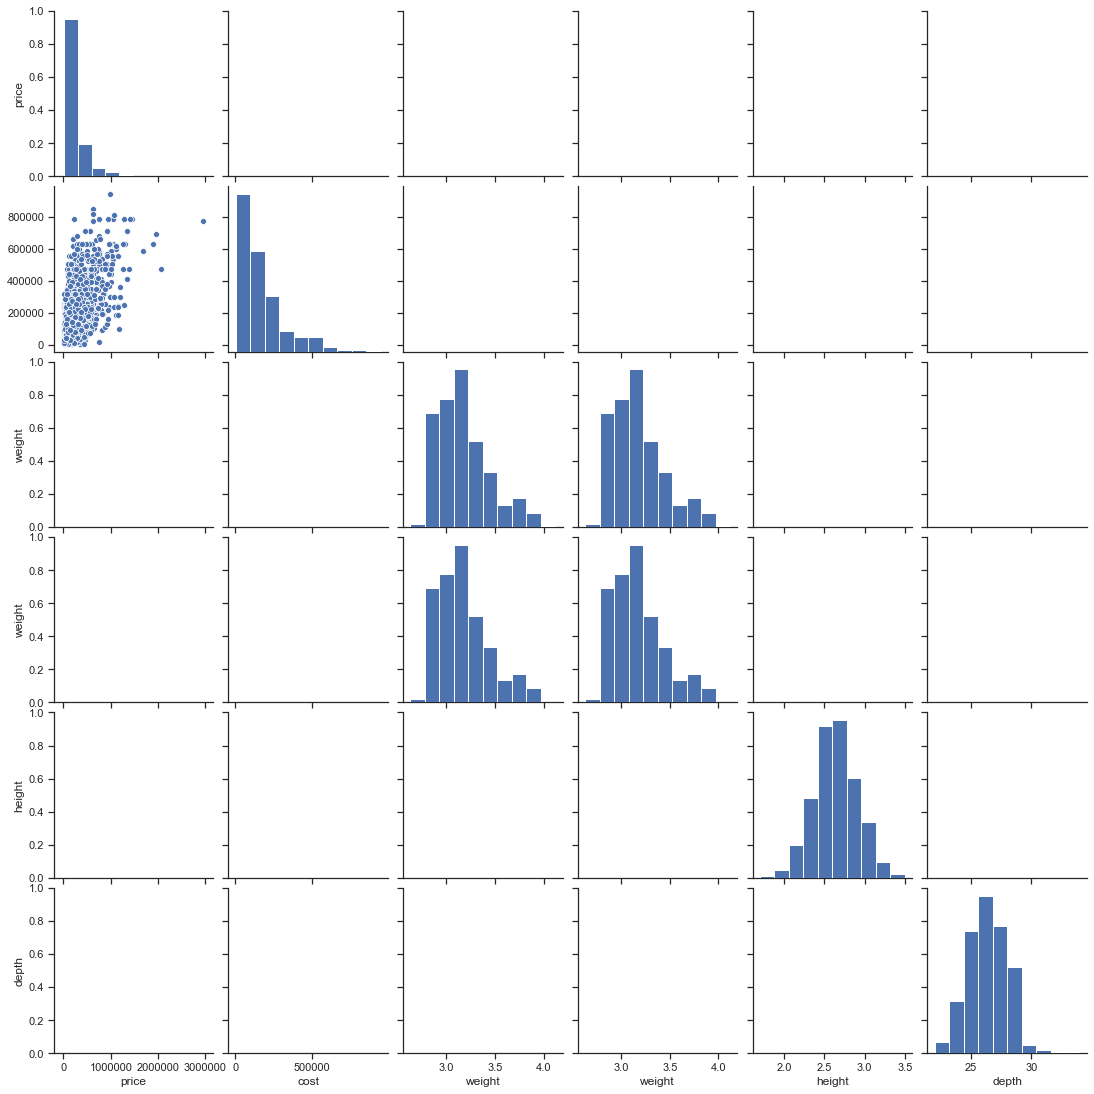

In [51]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
# 设置风格样式
sns.set(style="ticks", color_codes=True)
# 构建数据

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline  



sns.pairplot(new1, vars=['price', 'cost','weight','weight','height','depth'])
plt.show()


<font color='red'>Question:</font> Which features are highly correlated?

In [ ]:
#Price and cost

# 2. Collinearity

<font color='red'>Assignment:</font> Build a transformer class to get numerical features and replace the missing values with the averages in train_raw.

In [52]:
#price, cost, weight, height, width, and depth in train_raw.
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)
train_raw

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,333000.0,300492.0,3.90,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,97.0,26.0,2008
1,NaN,430570.0,3.30,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,98.0,26.0,1997
2,270000.0,213070.0,3.40,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,93.0,24.0,2001
3,97000.0,122659.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,101.0,26.0,2000
4,59000.0,60320.0,2.93,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71,96.0,25.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2752,254000.0,255179.0,3.40,Apr 20 2012,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02,113.0,30.0,2012
2753,91000.0,144631.0,2.89,Jul 12 2002,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52,99.0,26.0,2002
2754,NaN,40384.0,2.83,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15,106.0,28.0,2007
2755,44000.0,55931.0,2.95,Apr 12 2002,R,advanced,M14341,IN732587,2.52,100.0,26.0,2002


In [53]:

class Col_Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        #df['price'] =X.price.map(self.price2num)
        df['weight'] =X.weight.map(self.weight2num)
        df['height'] =X.height.map(self.height2num)
        df['width'] =X.width.map(self.width2num)
        df['height'] =X.height.map(self.height2num)
        df['depth'] =X.depth.map(self.depth2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
    # df['price'] =X.price.map(self.price2num)
        df['weight'] =X.weight.map(self.weight2num)
        df['height'] =X.height.map(self.height2num)
        df['width'] =X.width.map(self.width2num)
        df['height'] =X.height.map(self.height2num)
        df['depth'] =X.depth.map(self.depth2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x
    
    #def price2num(self, x):

    
     #   if type(x) == str: # only works when x is a string
      #      x = x.strip('$') # remove the dollar sign at the front of the substring
       #     x = x.replace(',', '') # remove ','
        #return float(x)

    def weight2num(self, x):
    
    

        if type(x) == str: # only works when x is a string
            x = x.strip(' Kg') # remove the ' Kg' at the end of the substring
            x = x.replace(' Ton ', '.') # remove ' Ton '
        return float(x)

    def height2num(self, x):

    
    
        if type(x) == str: # only works when x is a string
            x = x.strip(' meters') # remove the ' meters' at the end of the substring
        return float(x)
   
    def width2num(self, x):
    
   
        if type(x) == str: # only works when x is a string
            x = x.strip(' cm') # remove the ' cm' at the end of the substring
        return float(x)


    def height2num(self, x):
   # This function transform height string to numerical value. The unit kept is meters
        if type(x) == str: # only works when x is a string
            x = x.strip(' meters') # remove the ' meters' at the end of the substring
        return float(x)

    def depth2num(self, x):

#    This function transform depth string to numerical value. The unit kept is cm

        if type(x) == str: # only works when x is a string
            x = x.strip(' cm') # remove the ' cm' at the end of the substring
        return float(x)
   

In [54]:
ctf =Col_Transformer()
ctf.fit_transform(train_raw).head()


,cost,weight,height,width,depth
0,333000.000000,3.90,2.76,97.0,26.0
1,166184.183143,3.30,2.67,98.0,26.0
2,270000.000000,3.40,3.00,93.0,24.0
3,97000.000000,2.97,2.47,101.0,26.0
4,59000.000000,2.93,2.71,96.0,25.0


<font color='red'>Assignment:</font> Wrap up the numerical transformer, MinMaxScaler, and linear regression as a pipeline to predict **price**. 

In [59]:
features = list(train_raw.columns)
X_train = train_raw[features]

target = 'price'
features.remove(target)

X_train = train_raw[features]

y_train = train_raw[target].map(price2num)

X_train
#y_train


,cost,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,333000.0,3.90,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,97.0,26.0,2008
1,NaN,3.30,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,98.0,26.0,1997
2,270000.0,3.40,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,93.0,24.0,2001
3,97000.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,101.0,26.0,2000
4,59000.0,2.93,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71,96.0,25.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
2752,254000.0,3.40,Apr 20 2012,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02,113.0,30.0,2012
2753,91000.0,2.89,Jul 12 2002,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52,99.0,26.0,2002
2754,NaN,2.83,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15,106.0,28.0,2007
2755,44000.0,2.95,Apr 12 2002,R,advanced,M14341,IN732587,2.52,100.0,26.0,2002


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
list(train_raw.columns)
list(X_train)
list(y_train)

[300492.0,
 430570.0,
 213070.0,
 122659.0,
 60320.0,
 182233.0,
 41155.0,
 180759.0,
 182517.0,
 228868.0,
 79384.0,
 118628.0,
 204305.0,
 20711.0,
 24246.0,
 524575.0,
 107802.0,
 257688.0,
 437664.0,
 83402.0,
 244020.0,
 119493.0,
 144294.0,
 92690.0,
 37691.0,
 402187.0,
 240262.0,
 52198.0,
 664385.0,
 337549.0,
 127028.0,
 119127.0,
 171129.0,
 99159.0,
 33607.0,
 121944.0,
 301233.0,
 123238.0,
 104479.0,
 112719.0,
 382562.0,
 55362.0,
 56796.0,
 117899.0,
 14037.0,
 369502.0,
 102464.0,
 249700.0,
 69228.0,
 539121.0,
 514165.0,
 435805.0,
 164316.0,
 180878.0,
 9522.0,
 34528.0,
 214302.0,
 26152.0,
 51556.0,
 128513.0,
 101693.0,
 180437.0,
 16437.0,
 71349.0,
 86712.0,
 53210.0,
 31548.0,
 58579.0,
 98006.0,
 200874.0,
 51462.0,
 215210.0,
 66627.0,
 28935.0,
 8689.0,
 111945.0,
 27652.0,
 60681.0,
 344417.0,
 70076.0,
 112866.0,
 132407.0,
 36420.0,
 90957.0,
 155518.0,
 206973.0,
 50857.0,
 132734.0,
 120588.0,
 160013.0,
 116832.0,
 79196.0,
 222670.0,
 73399.0,
 11164

In [ ]:
steps = [('ctf', Col_Transformer()),
         ('poly', PolynomialFeatures(degree=30)),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

<font color='red'>Assignment:</font> Obtain the training and testing scores. 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print("score", clf.score(X_test, y_test))


<font color='red'>Assignment:</font> Plot the feature importance. Hint: coefficients in linear regression. 

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)
df_feature_importance = X_test.DataFrame(reg.feature_importances_, index=boston.feature_names, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance
df_feature_all = X_test.DataFrame([tree.feature_importances_ for tree in reg.estimators_], columns=boston.feature_names)
df_feature_all.head()


<font color='red'>Question:</font> How do you explain these feature importance?

In [ ]:
# It provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model.

<font color='red'>Assignment:</font> Remove **volumn**, **width**, and **height**, repeat the above steps.

In [ ]:
#My computer is very slow after I ran the price model. I am not able to do it.

<font color='red'>Question:</font> What are the differences in training/testing scores and feature importance?

In [ ]:
# didn't find the answer from google.

<font color='red'>Question:</font> What is collinearity? How can we solve it?

In [ ]:
#The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
#Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.
# We can figure it out by testing "Variance Inflation Factors (VIF)"